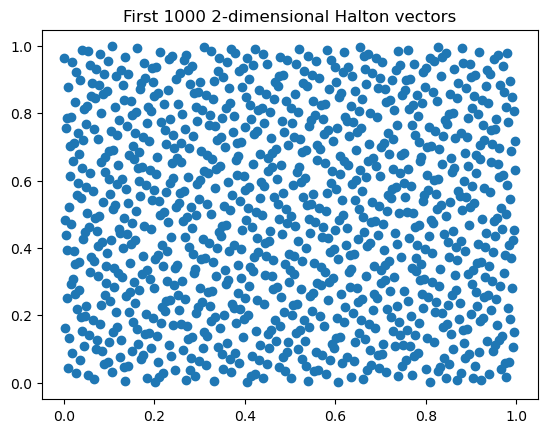

PyObject Text(0.5, 1.0, 'First 1000 2-dimensional Halton vectors')

In [55]:
# PROBLEM 2

# OKTEN'S CODE FOR HALTON SEQUENCES
using Primes, PyPlot

function vdc(n,b)
    digs=digits(n,base=b)
    sum=0.0
    for i in 1:length(digs)
        sum = sum + digs[i]/b^i
    end
    return(sum)
end

lprimes = primes(2,200)

function halton(n,s)
    [vdc(n,i) for i in lprimes[1:s]]
end

# PRODUCING 1000 2-DIMENSIONAL HALTON VECTORS
hal_2d_1000=[halton(n,2) for n in 1:1000]

# CONVERTING VECTOR OF VECTORS TO A MATRIX SO I CAN SLICE IT MORE EASILY FOR PLOTTING
scatter(reduce(hcat,hal_2d_1000)'[:,1],reduce(hcat,hal_2d_1000)'[:,2])
title("First 1000 2-dimensional Halton vectors")

In [19]:
# PROBLEM 3

using Random

# QUADRATURE FUNCTION
function quad(n,method)
    sum = 0
    for i in 1:n
        if method == "MT" # GENERATE RANDOM NUMBER USING MARSENNE TWISTER
            x = rand(MersenneTwister())
        elseif method == "SH" # GENERATE RANDOM NUMBER USING SHIFTED HALTON
            x = halton(i,1)[1] + rand()
            x = x - floor(x)
        end
        sum += log(x + 1)
    end
    return sum/n
end

quad (generic function with 1 method)

In [35]:
# PRODUCE 40 ESTIMATES OF INTEGRAL USING 1000 NODES GENERATED FROM MARSENNE TWISTER

m = 40
n = 1000
MT_θ_1000 = zeros(m)
for i in 1:m
    MT_θ_1000[i] = quad(n,"MT")
end

# MEAN AND STANDARD DEVIATION OF ESIMATES
using Statistics
println("mean: ",mean(MT_θ_1000))
println("std deviation: ",std(MT_θ_1000))

mean: 0.3871928815828024
std deviation: 0.005972220182818316


In [36]:
# PRODUCE 40 ESTIMATES OF INTEGRAL USING 1000 NODES GENERATED FROM SHIFTED HALTON SEQUENCES

m = 40
n = 1000
halton_θ_1000 = zeros(m)
for i in 1:m
    halton_θ_1000[i] = quad(n,"SH")
end

# MEAN AND STANDARD DEVIATION OF ESIMATES
println("mean: ",mean(halton_θ_1000))
println("std deviation: ",std(halton_θ_1000))

mean: 0.38765798221725756
std deviation: 0.006190993820431513


In [37]:
# PRODUCE 40 ESTIMATES OF INTEGRAL USING 10000 NODES GENERATED FROM MARSENNE TWISTER

m = 40
n = 10000
MT_θ_10000 = zeros(m)
for i in 1:m
    MT_θ_10000[i] = quad(n,"MT")
end

# MEAN AND STANDARD DEVIATION OF ESIMATES
println("mean: ",mean(MT_θ_10000))
println("std deviation: ",std(MT_θ_10000))

mean: 0.3860290436909056
std deviation: 0.002144122981454711


In [38]:
# PRODUCE 40 ESTIMATES OF INTEGRAL USING 10000 NODES GENERATED FROM SHIFTED HALTON SEQUENCES

m = 40
n = 10000
halton_θ_10000 = zeros(m)
for i in 1:m
    halton_θ_10000[i] = quad(n,"SH")
end

# MEAN AND STANDARD DEVIATION OF ESIMATES
println("mean: ",mean(halton_θ_10000))
println("std deviation: ",std(halton_θ_10000))

mean: 0.386067835185348
std deviation: 0.0017122008286422144


In [89]:
using Markdown

Markdown.parse(raw"""In order to solve the integral, we can use integration by parts where u = ln(1+x) and dv = 1:
```math
\int_0^1 ln(1+x) \, dx=xln(1+x)\rvert_0^1-\int_0^1 \frac{x}{1+x}=ln(2)-(x-ln(1+x))\rvert_0^1=ln(2)-(1-ln(2))=2ln(2)-1\approx0.38629
```
""")

In order to solve the integral, we can use integration by parts where u = ln(1+x) and dv = 1:

$$
\int_0^1 ln(1+x) \, dx=xln(1+x)\rvert_0^1-\int_0^1 \frac{x}{1+x}=ln(2)-(x-ln(1+x))\rvert_0^1=ln(2)-(1-ln(2))=2ln(2)-1\approx0.38629
$$


In [96]:
using Markdown

Markdown.parse(raw"""
    Comparing this to the computed means of the 4 methods above, Shifted Halton with 10,000 nodes performed the best, 
    with a deviance from the true value of 0.38629 by -.000223, with the lowest standard deviation of all methods. 
    Below are histograms of the distributions of each method with the true integration value as well as the mean of the 
    distribution plotted as vertical lines. It is clear that the Shifted Halton Sequence with 10,000 nodes has smallest spread 
    and a mean that is closest to the true integration value (when adjusted for scale)
""")

```
Comparing this to the computed means of the 4 methods above, Shifted Halton with 10,000 nodes performed the best, 
with a deviance from the true value of 0.38629 by -.000223, with the lowest standard deviation of all methods. 
Below are histograms of the distributions of each method with the true integration value as well as the mean of the 
distribution plotted as vertical lines. It is clear that the Shifted Halton Sequence with 10,000 nodes has smallest spread 
and a mean that is closest to the true integration value (when adjusted for scale)
```


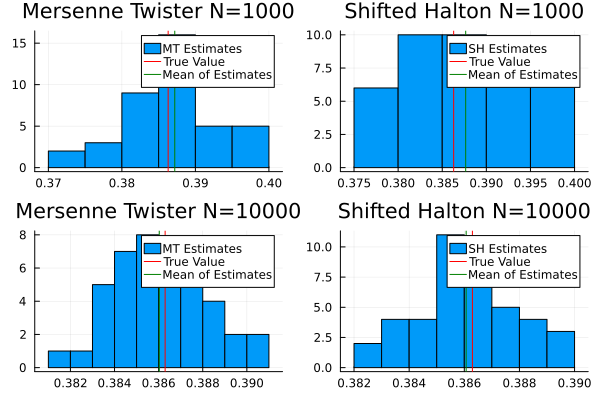

In [93]:
using Plots
p1 = histogram(MT_θ_1000, title="Mersenne Twister N=1000", bins=10, label="MT Estimates")
Plots.plot!([2*log(2)-1], seriestype="vline", color=:red, label="True Value")
Plots.plot!([mean(MT_θ_1000)], seriestype="vline", color=:green, label="Mean of Estimates")
p2 = histogram(halton_θ_1000, title="Shifted Halton N=1000", bins=10, label="SH Estimates")
Plots.plot!([2*log(2)-1], seriestype="vline", color=:red, label="True Value")
Plots.plot!([mean(halton_θ_1000)], seriestype="vline", color=:green, label="Mean of Estimates")
p3 = histogram(MT_θ_10000, title="Mersenne Twister N=10000", bins=10, label="MT Estimates")
Plots.plot!([2*log(2)-1], seriestype="vline", color=:red, label="True Value")
Plots.plot!([mean(MT_θ_10000)], seriestype="vline", color=:green, label="Mean of Estimates")
p4 = histogram(halton_θ_10000, title="Shifted Halton N=10000", bins=10, label="SH Estimates")
Plots.plot!([2*log(2)-1], seriestype="vline", color=:red, label="True Value")
Plots.plot!([mean(halton_θ_10000)], seriestype="vline", color=:green, label="Mean of Estimates")
Plots.plot(p1, p2, p3, p4, layout=(2, 2), legend=true)
